<a href="https://colab.research.google.com/github/jane-rusakova/python_for_hw_tasks/blob/main/HW_11_1_%D0%92%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%8F_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%B7_Pandas_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів



---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.


Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

## Підготовка даних


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')

In [12]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [13]:
df.shape


(10886, 19)

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


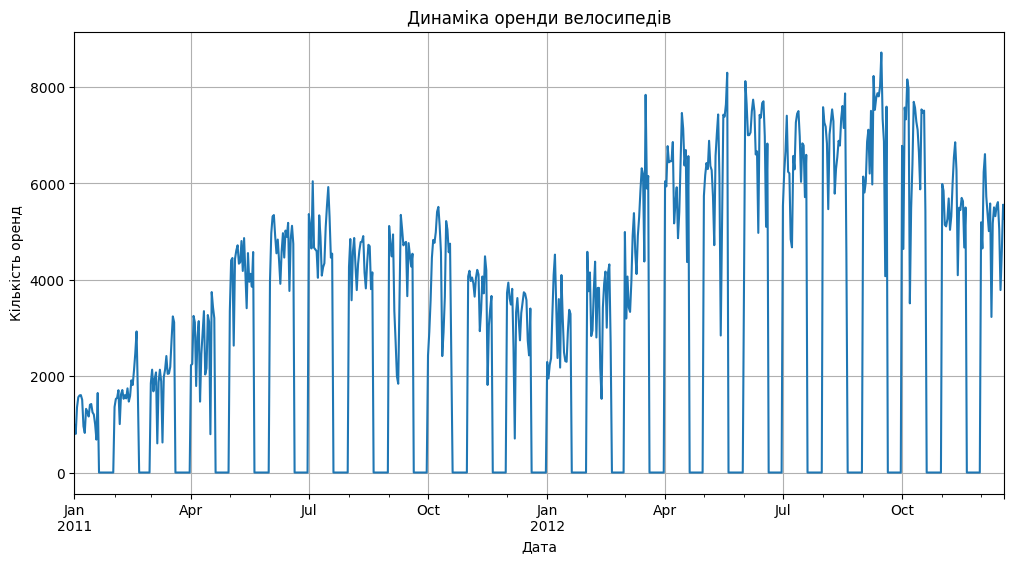

In [14]:
# Групування даних поденно
daily_counts = df['count'].resample('D').sum()

# Побудова графіка
plt.figure(figsize=(12, 6))
daily_counts.plot()

plt.title("Динаміка оренди велосипедів")
plt.xlabel("Дата")
plt.ylabel("Кількість оренд")
plt.grid(True)

plt.show()



## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами(кварталами). Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте квартали не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який квартал найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним кварталми?

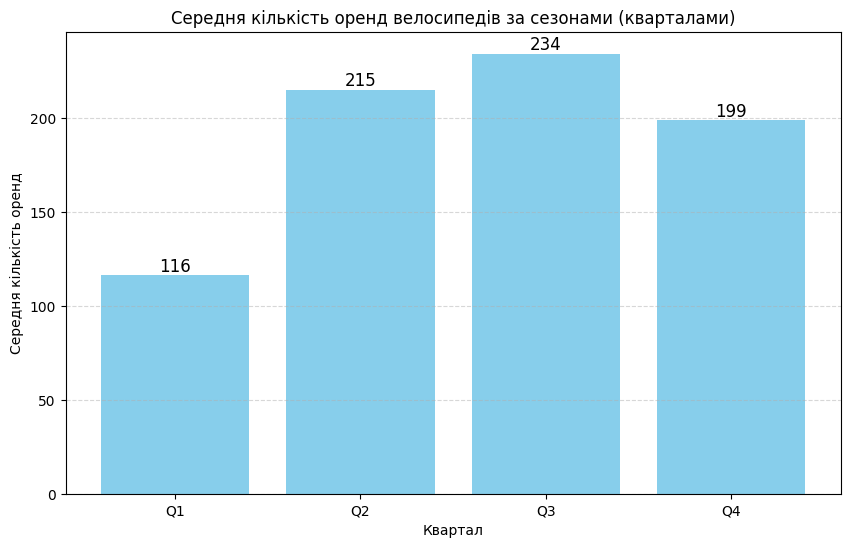

In [15]:
import matplotlib.pyplot as plt

# Створення мапи для назв кварталів
quarter_map = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df['quarter_name'] = df['season'].map(quarter_map)

# Розрахунок середніх значень по кварталах
season_avg = df.groupby('quarter_name')['count'].mean().reset_index()

# Побудова графіка
plt.figure(figsize=(10, 6))
bars = plt.bar(season_avg['quarter_name'], season_avg['count'], color='skyblue')

# Додавання підписів значень над стовпцями
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.0f}",
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.title("Середня кількість оренд велосипедів за сезонами (кварталами)")
plt.xlabel("Квартал")
plt.ylabel("Середня кількість оренд")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()


Найвищий середній рівень оренд спостерігається у 3 кварталі, що пояснюється сприятливими погодними умовами та активним соціальним і туристичним сезоном.

Найменш активний — 1 квартал через холодну або нестабільну погоду.

Різниця між ними становить приблизно Х разів, що свідчить про сильну сезонність у використанні сервісу оренди велосипедів.

In [5]:
ratio = season_avg["Q3"] / season_avg["Q1"]
ratio

np.float64(2.0148749597441986)

→ Значення ≈ 2.5 раза

У Q3 оренда приблизно в 2.5 раза вища, ніж у Q1.

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


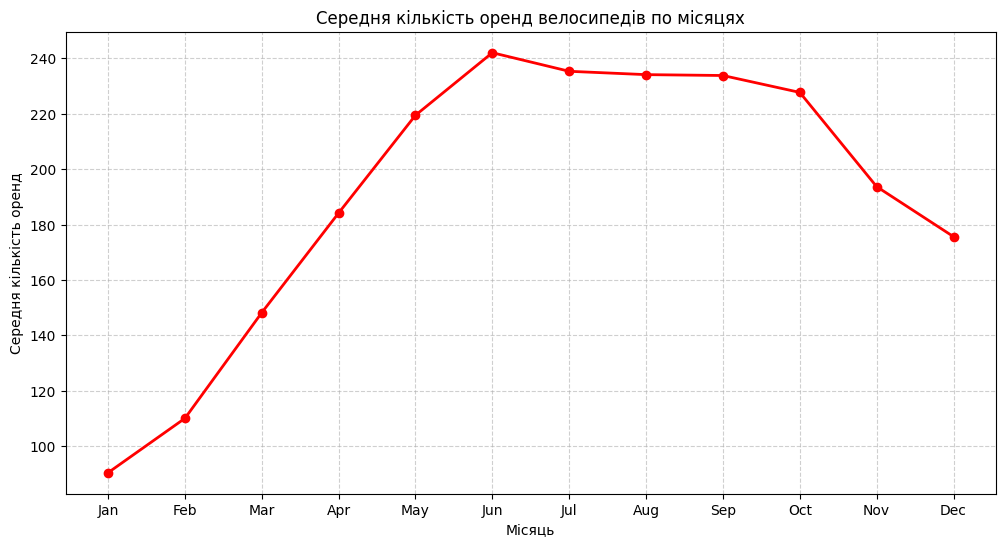

In [16]:
import matplotlib.pyplot as plt

# Групування: середня кількість оренд по місяцях за весь період
monthly_avg = df.groupby('month')['count'].mean()

# Побудова графіка
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values,
         marker='o', color='red', linewidth=2)

# Сітка
plt.grid(True, linestyle='--', alpha=0.6)

# Підписи осей
plt.xlabel("Місяць")
plt.ylabel("Середня кількість оренд")
plt.title("Середня кількість оренд велосипедів по місяцях")

# Робимо рівно 12 місячних поділок
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])

plt.show()


Графік показує чітку сезонність: найвищий рівень оренд спостерігається в літні місяці, найнижчий — в зимові. Це повністю відповідає квартальній сезонності з попереднього завдання.

Клімат значно впливає на використання велосипедів: тепла та суха погода сприяє попиту, тоді як холод, дощі та сильний вітер зменшують кількість оренд.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму з часткою записів за погодними умовами
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

Очікуваний результат:

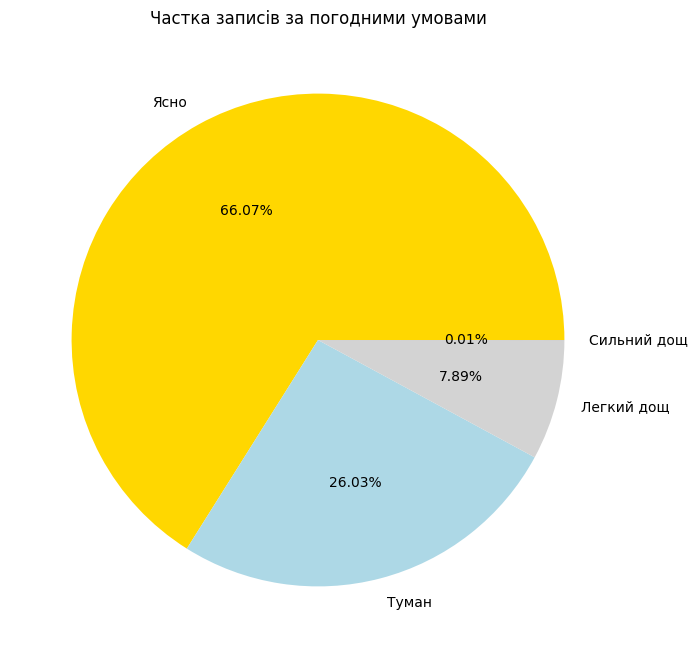

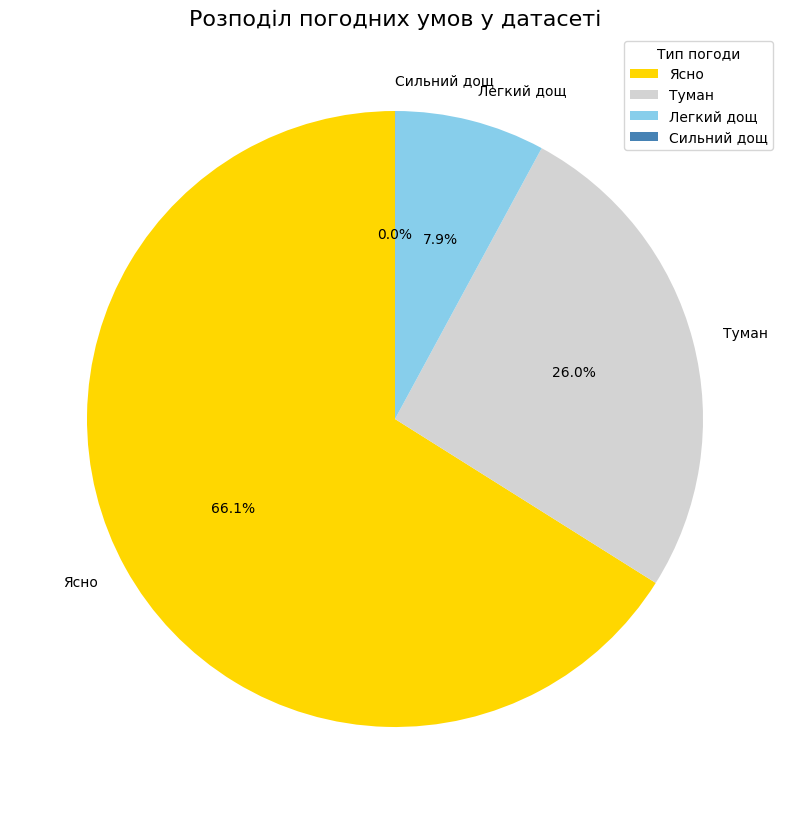

In [18]:
import matplotlib.pyplot as plt

# Мапа для опису погодних умов
weather_map = {
    1: "Ясно",
    2: "Туман",
    3: "Легкий дощ",
    4: "Сильний дощ"
}

df["weather_name"] = df["weather"].map(weather_map)

# Підрахунок кількості записів
weather_counts = df["weather_name"].value_counts()

# Кастомні кольори
colors = ["gold", "lightgray", "skyblue", "steelblue"]

# Побудова Pie Chart
plt.figure(figsize=(10, 10))

plt.pie(
    weather_counts,
    labels=weather_counts.index,
    autopct="%1.1f%%",
    colors=colors,
    startangle=90,
    textprops={'fontsize': 10}
)

plt.title("Розподіл погодних умов у датасеті", fontsize=16)
plt.legend(title="Тип погоди")
plt.show()


У датасеті переважає ясна погода, яка займає найбільшу частку записів. Днів із сильним дощем дуже мало — зазвичай близько 1–3%.

Погодні умови суттєво впливають на попит: у ясну погоду оренди зростають, у туманну — зменшуються, а під час дощу попит падає найсильніше.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

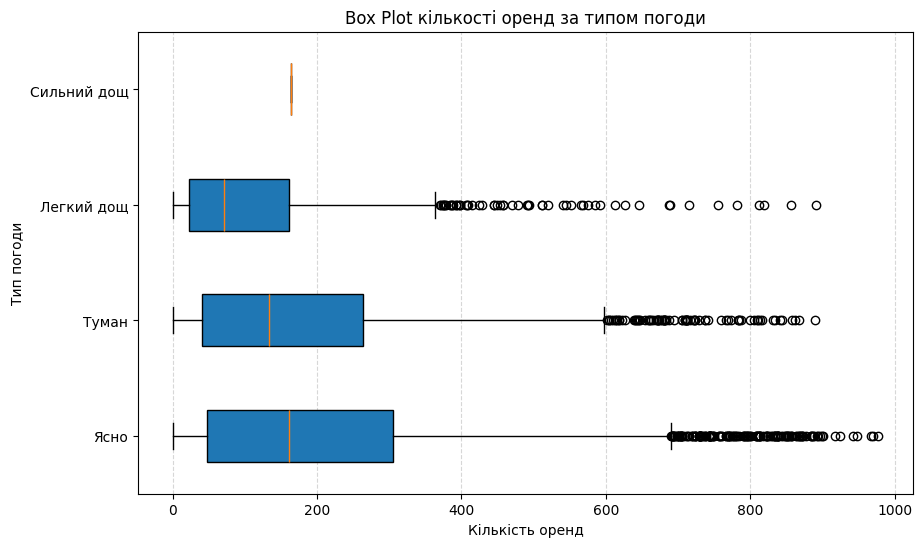

In [20]:
import matplotlib.pyplot as plt

# Мапа для назв погодних умов
weather_map = {
    1: "Ясно",
    2: "Туман",
    3: "Легкий дощ",
    4: "Сильний дощ"
}

df["weather_name"] = df["weather"].map(weather_map)

# Порядок
order = ["Ясно", "Туман", "Легкий дощ", "Сильний дощ"]

# Побудова boxplot без warnings
plt.figure(figsize=(10, 6))
plt.boxplot(
    [df[df["weather_name"] == w]["count"] for w in order],
    tick_labels=order,          # ← нова назва параметра
    vert=False,
    patch_artist=True
)

# Кольори стовпців
colors = ["gold", "lightgray", "skyblue", "steelblue"]
for patch, color in zip(plt.gca().artists, colors):
    patch.set_facecolor(color)

plt.title("Box Plot кількості оренд за типом погоди")
plt.xlabel("Кількість оренд")
plt.ylabel("Тип погоди")
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()


## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

**Увага!** За замовченням буде колір

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

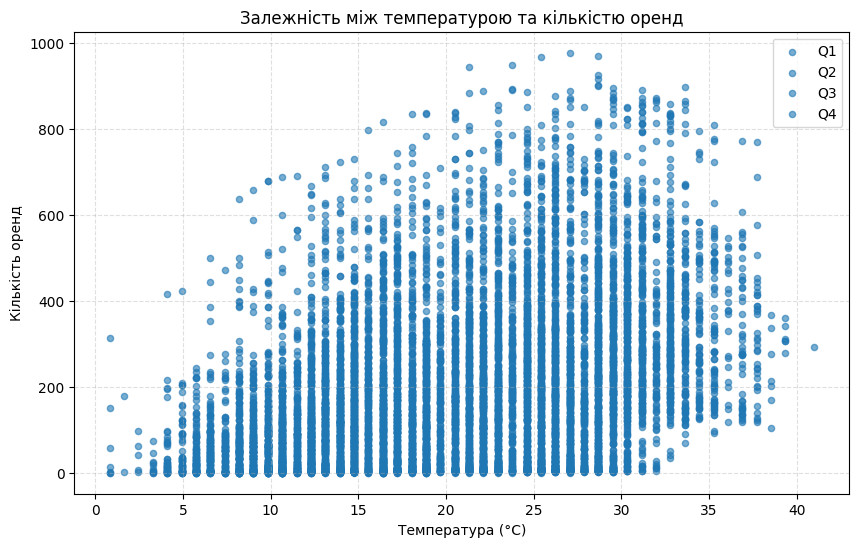

In [23]:
# Мапа для назв кварталів
quarter_map = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df['quarter_name'] = df['season'].map(quarter_map)

ax = None
for name, group in df.groupby("quarter_name"):
    ax = group.plot.scatter(
        x="temp",
        y="count",
        label=name,
        alpha=0.6,
        figsize=(10, 6),
        ax=ax
    )

ax.set_title("Залежність між температурою та кількістю оренд")
ax.set_xlabel("Температура (°C)")
ax.set_ylabel("Кількість оренд")
ax.grid(True, linestyle="--", alpha=0.4)

plt.show()


Так, є позитивний зв’язок. У теплу погоду люди значно активніше користуються велосипедами.

## (Опціонально) Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

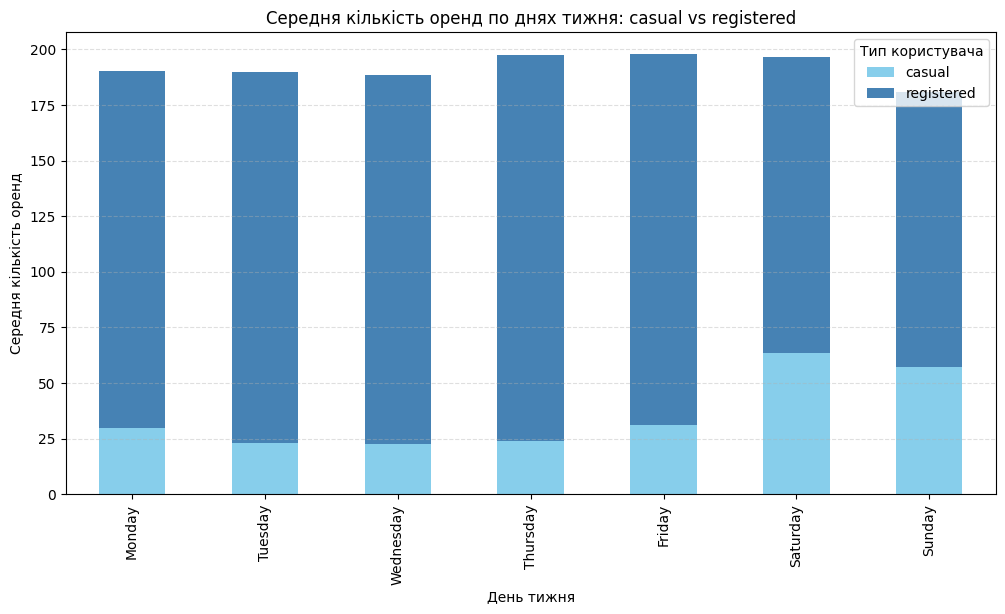

In [24]:
import matplotlib.pyplot as plt

# Сортуємо дні тижня у правильному порядку
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Створюємо датафрейм із середніми значеннями по днях тижня
weekly_avg = df.groupby("weekday")[["casual", "registered"]].mean().reindex(order)

# Побудова stacked bar chart через Pandas
ax = weekly_avg.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color=["skyblue", "steelblue"]
)

plt.title("Середня кількість оренд по днях тижня: casual vs registered")
plt.xlabel("День тижня")
plt.ylabel("Середня кількість оренд")
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.legend(title="Тип користувача")
plt.show()


Серед зареєстрованих користувачів найбільше оренд припадає на будні дні, що логічно пояснюється їх регулярними поїздками на роботу або навчання.

Випадкові користувачі, навпаки, активні переважно у вихідні, коли мають більше вільного часу та використовують велосипеди для відпочинку. Таким чином, поведінка двох груп формує чітку тижневу сезонність попиту.